By - Faiza and Swapnil

Goals of the Case Study

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

Steps to follow
- Reading, understanding and visualising the data.
- Preparing the data for modeling (train-test split, rescalling etc)
- Building the model
- Training the model
- Testing the model
- Predictions and evaluation on the test set

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the csv file

leads_data = pd.read_csv('Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Analysing the dataset

In [4]:
#checking total rows and cols in dataset
leads_data.shape

(9240, 37)

This dataset has: 9240 rows and 37 columns

In [5]:
#checking dataframe for null and datatype 
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#checking the details of numeriacl data
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#checking the size of data
leads_data.size

341880

## EDA

### Data Cleaning:

In [8]:
#dropping Lead Number and Prospect ID since they have all unique values

leads_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#Converting/Replacing 'Select' values to NaN in the complete dataset.

leads_data = leads_data.replace('Select', np.nan)

In [10]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
#checking null values in each rows

leads_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
#checking percentage of null values in each column

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
#dropping columns with more than 45% missing values

drop_columns = leads_data.columns

In [14]:
for i in drop_columns:
    if((100*(leads_data[i].isnull().sum()/len(leads_data.index))) >= 45):
        leads_data.drop(i, 1, inplace = True)

In [15]:
#checking null values percentage

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Categorical Attributes Analysis

### Country

In [16]:
#checking value counts of Country column

leads_data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Sweden                     3
China                      2
Philippines                2
Belgium                    2
Ghana                      2
Netherlands                2
Bangladesh                 2
Uganda                     2
Italy                      2
Asia/Pacific Region        2
Vietnam                    1
Indonesia                  1
Denmark                    1
Liberia                    1
Kenya                      1
Russia        

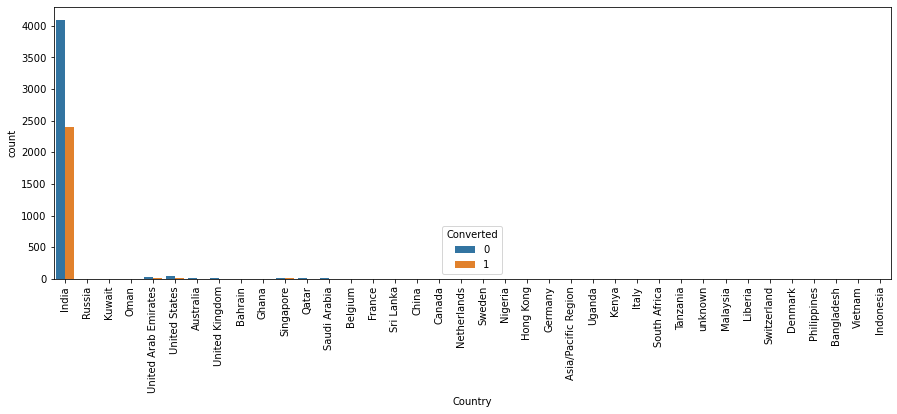

In [17]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize = (15,5))
s = sns.countplot(leads_data.Country, hue = leads_data.Converted)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

As we can see the Number of Values for India are quite high, this column can be dropped.

In [18]:
#creating a list of columns to be droppped

column_to_drop = ['Country']

### Specialization

In [19]:
#checking value counts of Specialization column

leads_data['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
#replacing NaN values here with 'Not Specified'
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Not Specified')

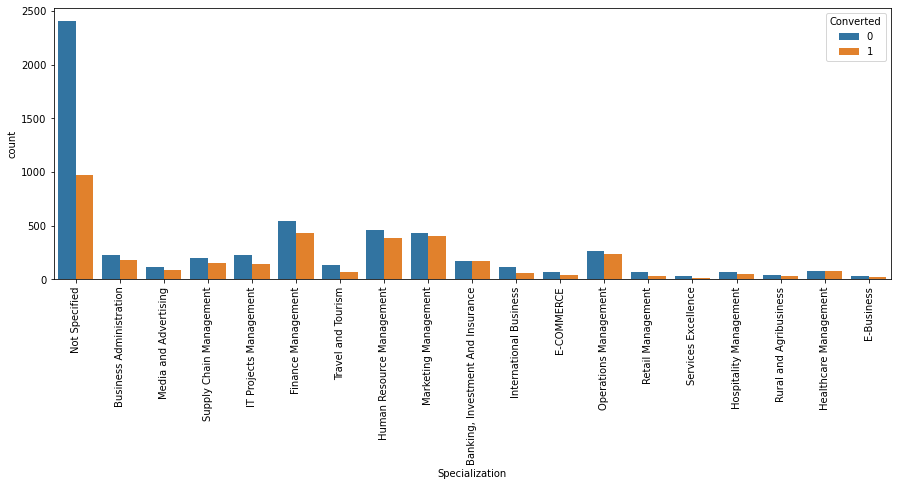

In [21]:
#plotting spread of Specialization columnn 

plt.figure(figsize = (15,5))
s = sns.countplot(leads_data.Specialization, hue = leads_data.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

We see that specialization with Management have higher number of leads as well as leads converted. So this is definitely a significant variable and will be used further for analysis.

In [22]:
#combining Management Specializations because they show similar trends

leads_data['Specialization'] = leads_data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

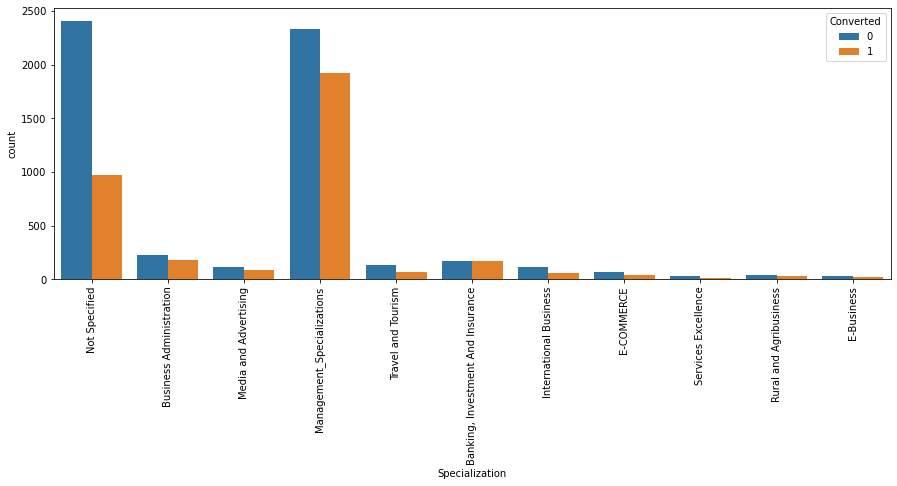

In [23]:
#visualizing count of Variable based on Converted value


plt.figure(figsize = (15,5))
s = sns.countplot(leads_data.Specialization, hue = leads_data.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

### City

In [24]:
#checking value counts of "City" column

leads_data['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [25]:
leads_data['City'] = leads_data['City'].replace(np.nan,'Mumbai')

In [26]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


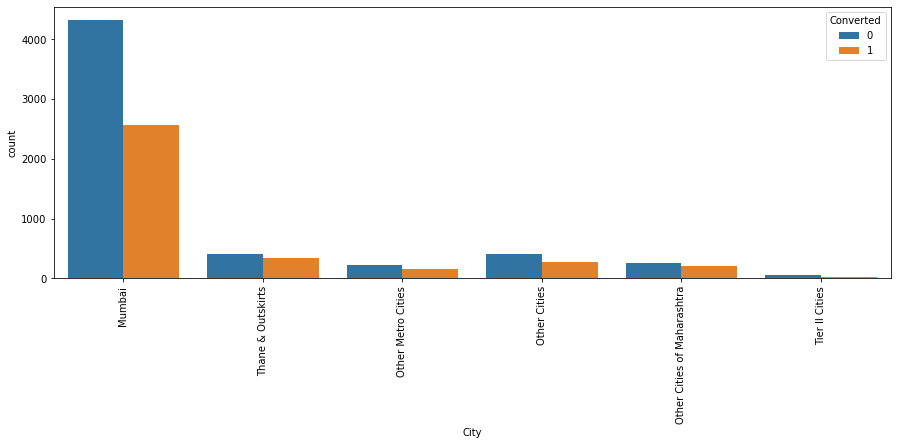

In [27]:
#Plotting spread of City columnn after replacing NaN values

plt.figure(figsize = (15,5))
s = sns.countplot(leads_data.City, hue = leads_data.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

### What is your current occupation

In [28]:
#What is your current occupation

leads_data['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#imputing Nan values with mode "Unemployed"

leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [30]:
#checking count of values
leads_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

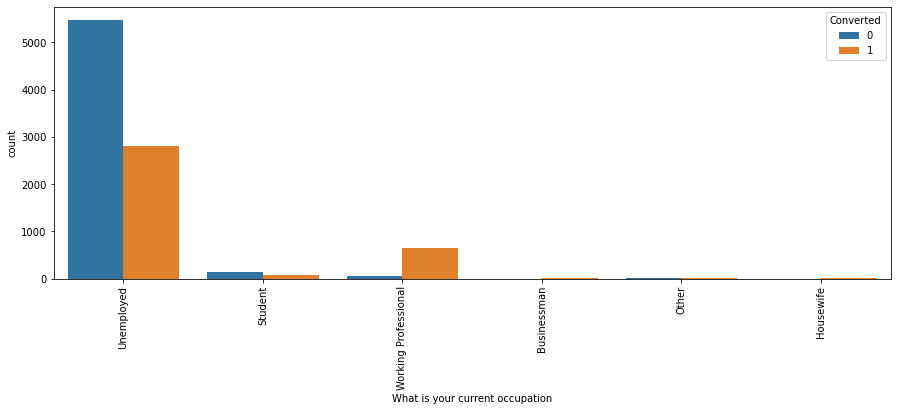

In [31]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (15,5))
s =sns.countplot(leads_data['What is your current occupation'], hue = leads_data.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

### What matters most to you in choosing a course

In [32]:
#checking value counts for What matters most to you in choosing a course

leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
#replacing Nan values with Mode "Better Career Prospects"

leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

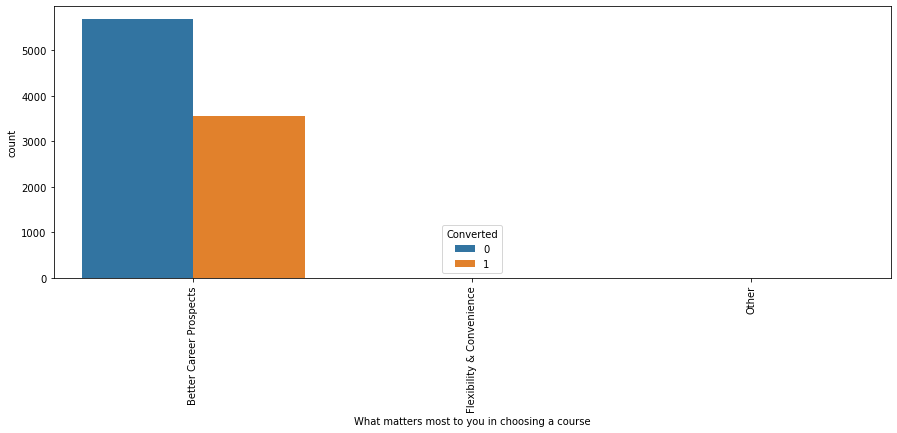

In [34]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (15,5))
s =sns.countplot(leads_data['What matters most to you in choosing a course'], hue = leads_data.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

In [35]:
#checking value counts of variable
leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
#We have another Column that is worth Dropping. So we Append to the column_to_drop List
column_to_drop.append('What matters most to you in choosing a course')
column_to_drop

['Country', 'What matters most to you in choosing a course']

### Tags

In [37]:
#checking value counts of Tag variable
leads_data['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [38]:
#replacing Nan values with "Not Specified"
leads_data['Tags'] = leads_data['Tags'].replace(np.nan,'Not Specified')

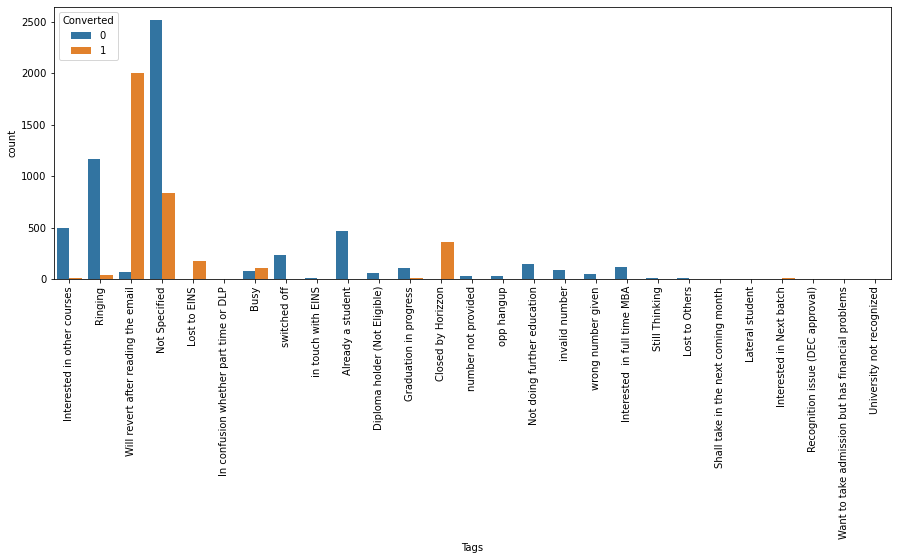

In [39]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (15,5))
s =sns.countplot(leads_data['Tags'], hue = leads_data.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

In [40]:
#replacing tags with low frequency with "Other Tags"
leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads_data['Tags'] = leads_data['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [41]:
#checking percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Lead Source

In [42]:
#checking value counts of Lead Source column

leads_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [43]:
#replacing Nan Value with Google
leads_data['Lead Source'] = leads_data['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_data['Lead Source'] = leads_data['Lead Source'].replace('google','Google')

In [44]:
#combining low frequency values to Others
leads_data['Lead Source'] = leads_data['Lead Source'].replace('Facebook','Social Media')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')  

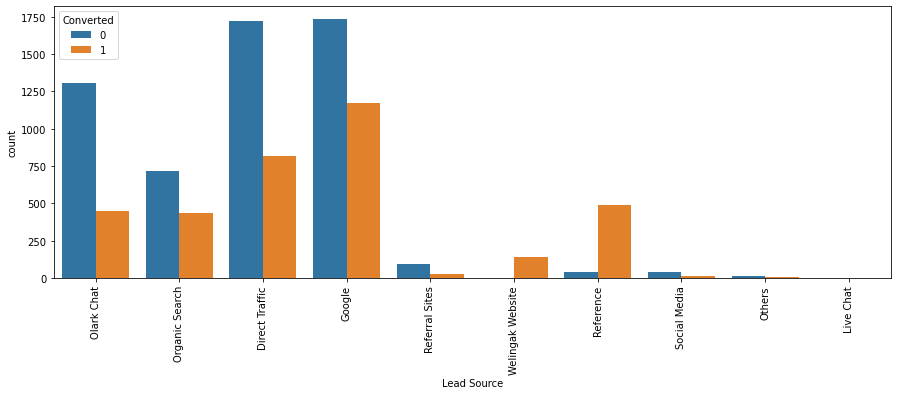

In [45]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize = (15,5))
s = sns.countplot(x = 'Lead Source', hue = 'Converted' , data = leads_data)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

Maximum number of leads are generated by Google and Direct traffic.

### Lead Origin

In [46]:
#Lead Origin
leads_data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

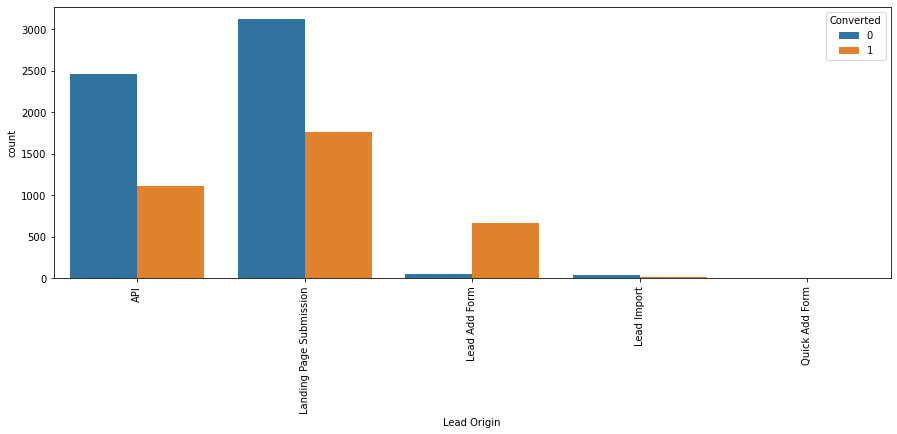

In [47]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (15,5))
s = sns.countplot(leads_data['Lead Origin'], hue = leads_data.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Import and Quick Add Form get very few leads.

### Last Activity

In [48]:
leads_data['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [49]:
#replacing Nan Values and combining low frequency values

leads_data['Last Activity'] = leads_data['Last Activity'].replace(np.nan,'Others')

In [50]:
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [51]:
leads_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [52]:
#Checking the Null Values in All Columns:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [53]:
#Drop all rows which have Nan Values. 
leads_data = leads_data.dropna()

In [54]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

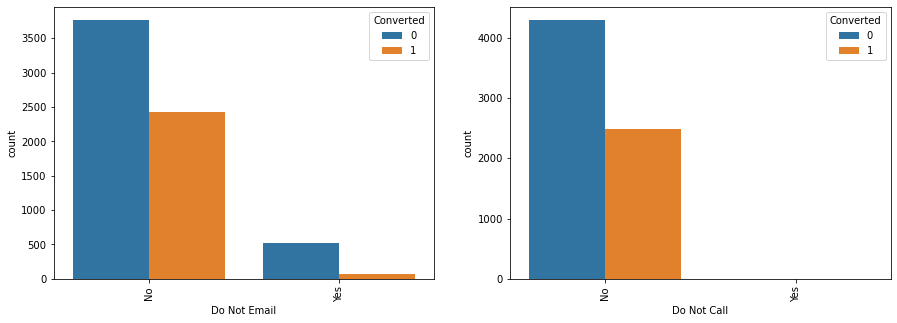

In [55]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize = (15,5))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(leads_data['Do Not Email'], hue = leads_data.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.countplot(leads_data['Do Not Call'], hue = leads_data.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.show()

In [56]:
#checking value counts for Do Not Email
leads_data['Do Not Email'].value_counts(dropna=False)

No     6186
Yes     593
Name: Do Not Email, dtype: int64

In [57]:
#checking value counts for Do Not Call
leads_data['Do Not Call'].value_counts(dropna=False)

No     6778
Yes       1
Name: Do Not Call, dtype: int64

In [58]:
#We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value
column_to_drop.append('Do Not Call')
column_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

### Variables that can be dropped

In [59]:
#adding imbalanced columns to the list of columns to be dropped

column_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [60]:
column_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

### Last notable activity

In [61]:
#checking value counts of last Notable Activity
leads_data['Last Notable Activity'].value_counts()

Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Email Received                     1
View in browser link Clicked       1
Email Marked Spam                  1
Form Submitted on Website          1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [62]:
#clubbing lower frequency values

leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

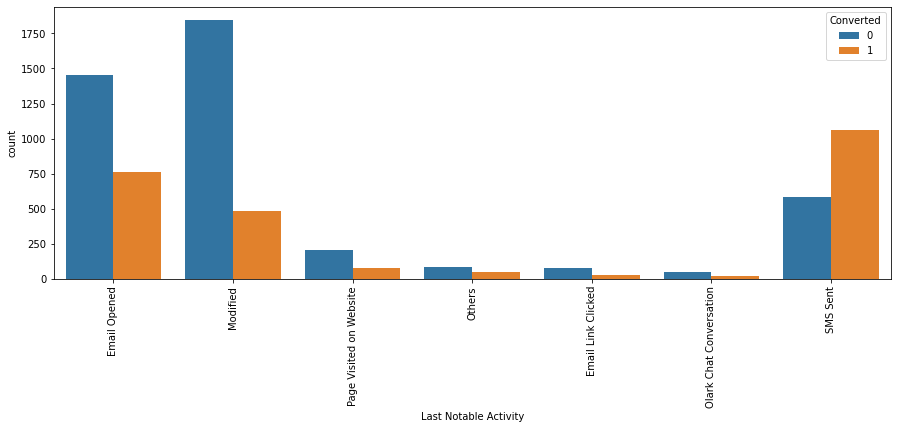

In [63]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (15,5))
ax1 = sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_data)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.show()

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

In [64]:
#checking value counts for variable

leads_data['Last Notable Activity'].value_counts()

Modified                   2331
Email Opened               2212
SMS Sent                   1643
Page Visited on Website     286
Others                      133
Email Link Clicked          106
Olark Chat Conversation      68
Name: Last Notable Activity, dtype: int64

In [65]:
#dropping columns
leads_data = leads_data.drop(column_to_drop,1)

#checking info of dataset for remaining columns
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6779 non-null   object 
 1   Lead Source                             6779 non-null   object 
 2   Do Not Email                            6779 non-null   object 
 3   Converted                               6779 non-null   int64  
 4   TotalVisits                             6779 non-null   float64
 5   Total Time Spent on Website             6779 non-null   int64  
 6   Page Views Per Visit                    6779 non-null   float64
 7   Last Activity                           6779 non-null   object 
 8   Specialization                          6779 non-null   object 
 9   What is your current occupation         6779 non-null   object 
 10  Tags                                    6779 non-null   obje

In [66]:
#checking dataset
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Management_Specializations,Unemployed,Will revert after reading the email,Mumbai,No,Modified


## Numerical Attributes Analysis 

In [67]:
# Finding out conversion rate

Converted_data = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted_data

36.65732408909869

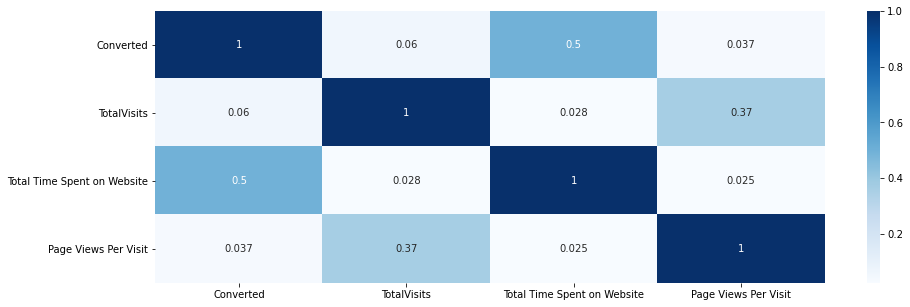

In [68]:
#Checking correlations of numeric values using heatmap

plt.figure(figsize = (15,5))
sns.heatmap(leads_data.corr(), cmap = "Blues", annot = True)
plt.show()

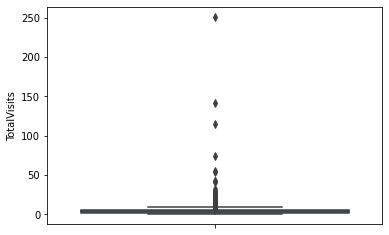

In [69]:
#visualizing spread of variable Total Visits

sns.boxplot(y = leads_data['TotalVisits'])
plt.show()

In [70]:
#checking percentile values for "Total Visits"

leads_data['TotalVisits'].describe(percentiles = [0.05,.25, .5, .75, .90, .95, .99])

count    6779.000000
mean        4.553917
std         5.138148
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.220000
max       251.000000
Name: TotalVisits, dtype: float64

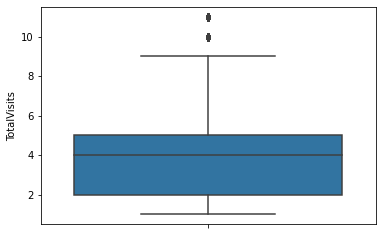

In [71]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads_data['TotalVisits'])
plt.show()

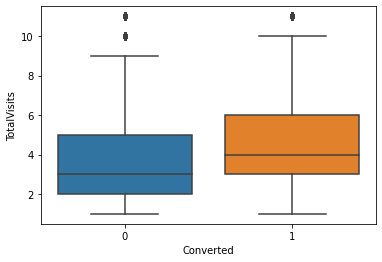

In [72]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.show()

In [73]:
leads_data.shape

(6779, 14)

### Total time spent on website 

In [74]:
#checking percentiles for "Total Time Spent on Website"

leads_data['Total Time Spent on Website'].describe(percentiles = [0.05,.25, .5, .75, .90, .95, .99])

count    6779.000000
mean      631.898658
std       542.115855
min         0.000000
5%         33.000000
25%       171.000000
50%       397.000000
75%      1105.500000
90%      1452.000000
95%      1606.000000
99%      1863.660000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

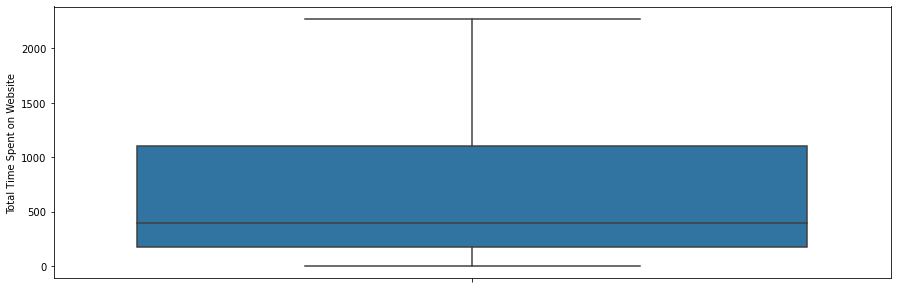

In [75]:
#visualizing spread of variable 'Total Time Spent on Website'
plt.figure(figsize = (15,5))
sns.boxplot(y = leads_data['Total Time Spent on Website'])
plt.show()

There are no major Outliers for the above variable

### Page views per visit

In [76]:
leads_data['Page Views Per Visit'].describe()

count    6779.000000
mean        3.126197
std         1.958933
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

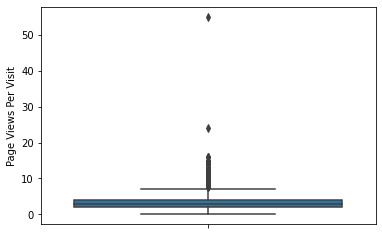

In [77]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y = leads_data['Page Views Per Visit'])
plt.show()

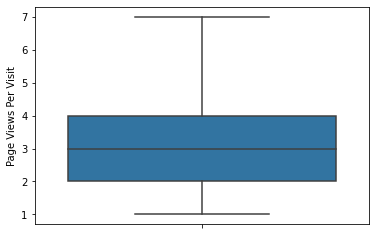

In [78]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percent = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percent[0]] = percent[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percent[1]] = percent[1]

#visualizing variable after outlier treatment
sns.boxplot(y = leads_data['Page Views Per Visit'])
plt.show()

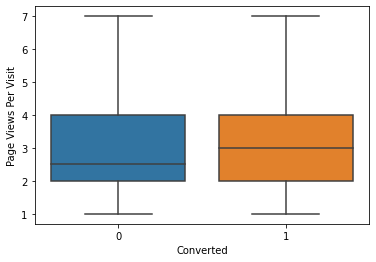

In [79]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.show()

Median for converted and not converted leads is almost same.

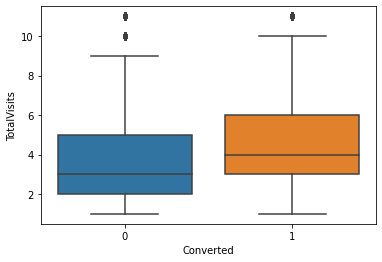

In [80]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.show()

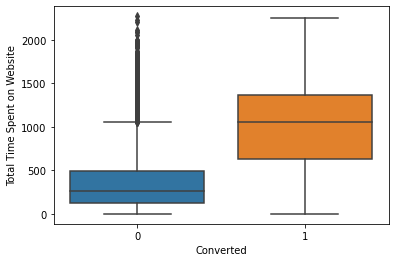

In [81]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x = leads_data.Converted, y = leads_data['Total Time Spent on Website'])
plt.show()

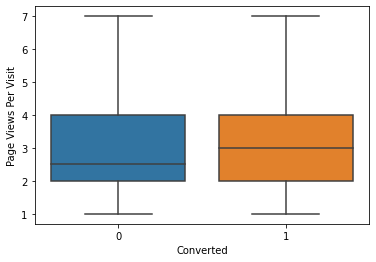

In [82]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x = leads_data.Converted, y = leads_data['Page Views Per Visit'])
plt.show()

The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

### Data Preparation

In [83]:
#checking missing values in leftover columns/

round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)


Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns to be analyzed further

In [84]:
#Converting Yes/no to 0 and 1

# List of variables to map

variable_list =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads_data[variable_list] = leads_data[variable_list].apply(binary_map)

In [85]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,Management_Specializations,Unemployed,Will revert after reading the email,Mumbai,0,Modified


### Creating Dummy Variables

In [86]:
#getting a list of categorical columns

cat_columns = leads_data.select_dtypes(include=['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [87]:
dummy = pd.get_dummies(leads_data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

In [88]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,1,0,0,0,0,0,0
9236,1,0,0,0,0,1,0,0,0,0,0,0
9237,1,0,0,0,0,1,0,0,0,0,0,0
9238,1,0,0,0,0,1,0,0,0,1,0,0


In [89]:
leads_data = pd.concat([leads_data,dummy],1)

In [90]:
leads_data

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Management_Specializations,Unemployed,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,...,0,0,0,1,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,1,0,0,0,0,0,0
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,...,0,0,0,1,0,0,0,1,0,0


In [91]:
dummy = pd.get_dummies(leads_data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [92]:
leads_data

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Management_Specializations,Unemployed,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,...,0,0,0,0,0,1,0,0,0,0
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,1,0,0,0,0,0,0,0,0
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,...,0,0,0,0,0,1,0,0,0,0


In [93]:
dummy = pd.get_dummies(leads_data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [94]:
leads_data

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Management_Specializations,Unemployed,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,...,0,0,1,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,1,0,0,0,0,0,0,0
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [95]:
dummy = pd.get_dummies(leads_data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [96]:
leads_data

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,0,1,0,0,0,0,0,0,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Management_Specializations,Unemployed,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,0,1
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,0,0,0,0,0,0,1
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,...,0,0,0,0,0,0,0,0,0,1


In [97]:
dummy = pd.get_dummies(leads_data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [98]:
leads_data

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,1
6,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Management_Specializations,Unemployed,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,...,0,0,0,0,0,0,0,0,0,1
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,1,0,0
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,1,0,0,0,0,1,0,0
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [99]:
#dropping the original columns after dummy variable creation

leads_data.drop(cat_columns,1,inplace = True)

In [100]:
leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,2.0,1640,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Test-Train Split

In [101]:
#importing library for splitting dataset

from sklearn.model_selection import train_test_split

In [102]:
# Putting feature variable to X
X=leads_data.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,2.0,1640,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [103]:
# Putting response variable to y
y = leads_data['Converted']

#checking head of y
y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [104]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4745 entries, 6071 to 7701
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          4745 non-null   int64  
 1   TotalVisits                                           4745 non-null   float64
 2   Total Time Spent on Website                           4745 non-null   int64  
 3   Page Views Per Visit                                  4745 non-null   float64
 4   A free copy of Mastering The Interview                4745 non-null   int64  
 5   Lead Origin_Landing Page Submission                   4745 non-null   uint8  
 6   Lead Origin_Lead Add Form                             4745 non-null   uint8  
 7   What is your current occupation_Housewife             4745 non-null   uint8  
 8   What is your current occupation_Other                 4

In [106]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 141 to 2177
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2034 non-null   int64  
 1   TotalVisits                                           2034 non-null   float64
 2   Total Time Spent on Website                           2034 non-null   int64  
 3   Page Views Per Visit                                  2034 non-null   float64
 4   A free copy of Mastering The Interview                2034 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2034 non-null   uint8  
 6   Lead Origin_Lead Add Form                             2034 non-null   uint8  
 7   What is your current occupation_Housewife             2034 non-null   uint8  
 8   What is your current occupation_Other                 20

In [107]:
y_train

6071    0
5188    0
1180    1
5563    0
6006    0
       ..
8250    0
98      1
5286    1
8146    1
7701    0
Name: Converted, Length: 4745, dtype: int64

In [108]:
y_test

141     0
3666    0
8605    0
4158    1
7687    0
       ..
4597    1
687     0
2628    0
7352    0
2177    0
Name: Converted, Length: 2034, dtype: int64

### Feature Scaling

In [109]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [110]:
#scaling of features
scaler = StandardScaler()

num_columns =X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

In [111]:
#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
6071,-0.311624,-0.484190,0.112425,-0.978894,-0.853210,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5188,-0.311624,-1.263525,-0.400158,-1.297703,-0.853210,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1180,3.208990,-0.484190,-0.698857,-0.978894,1.172044,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
5563,-0.311624,-0.873858,0.379779,-0.660085,-0.853210,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6006,-0.311624,0.684813,-0.503412,1.890388,1.172044,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


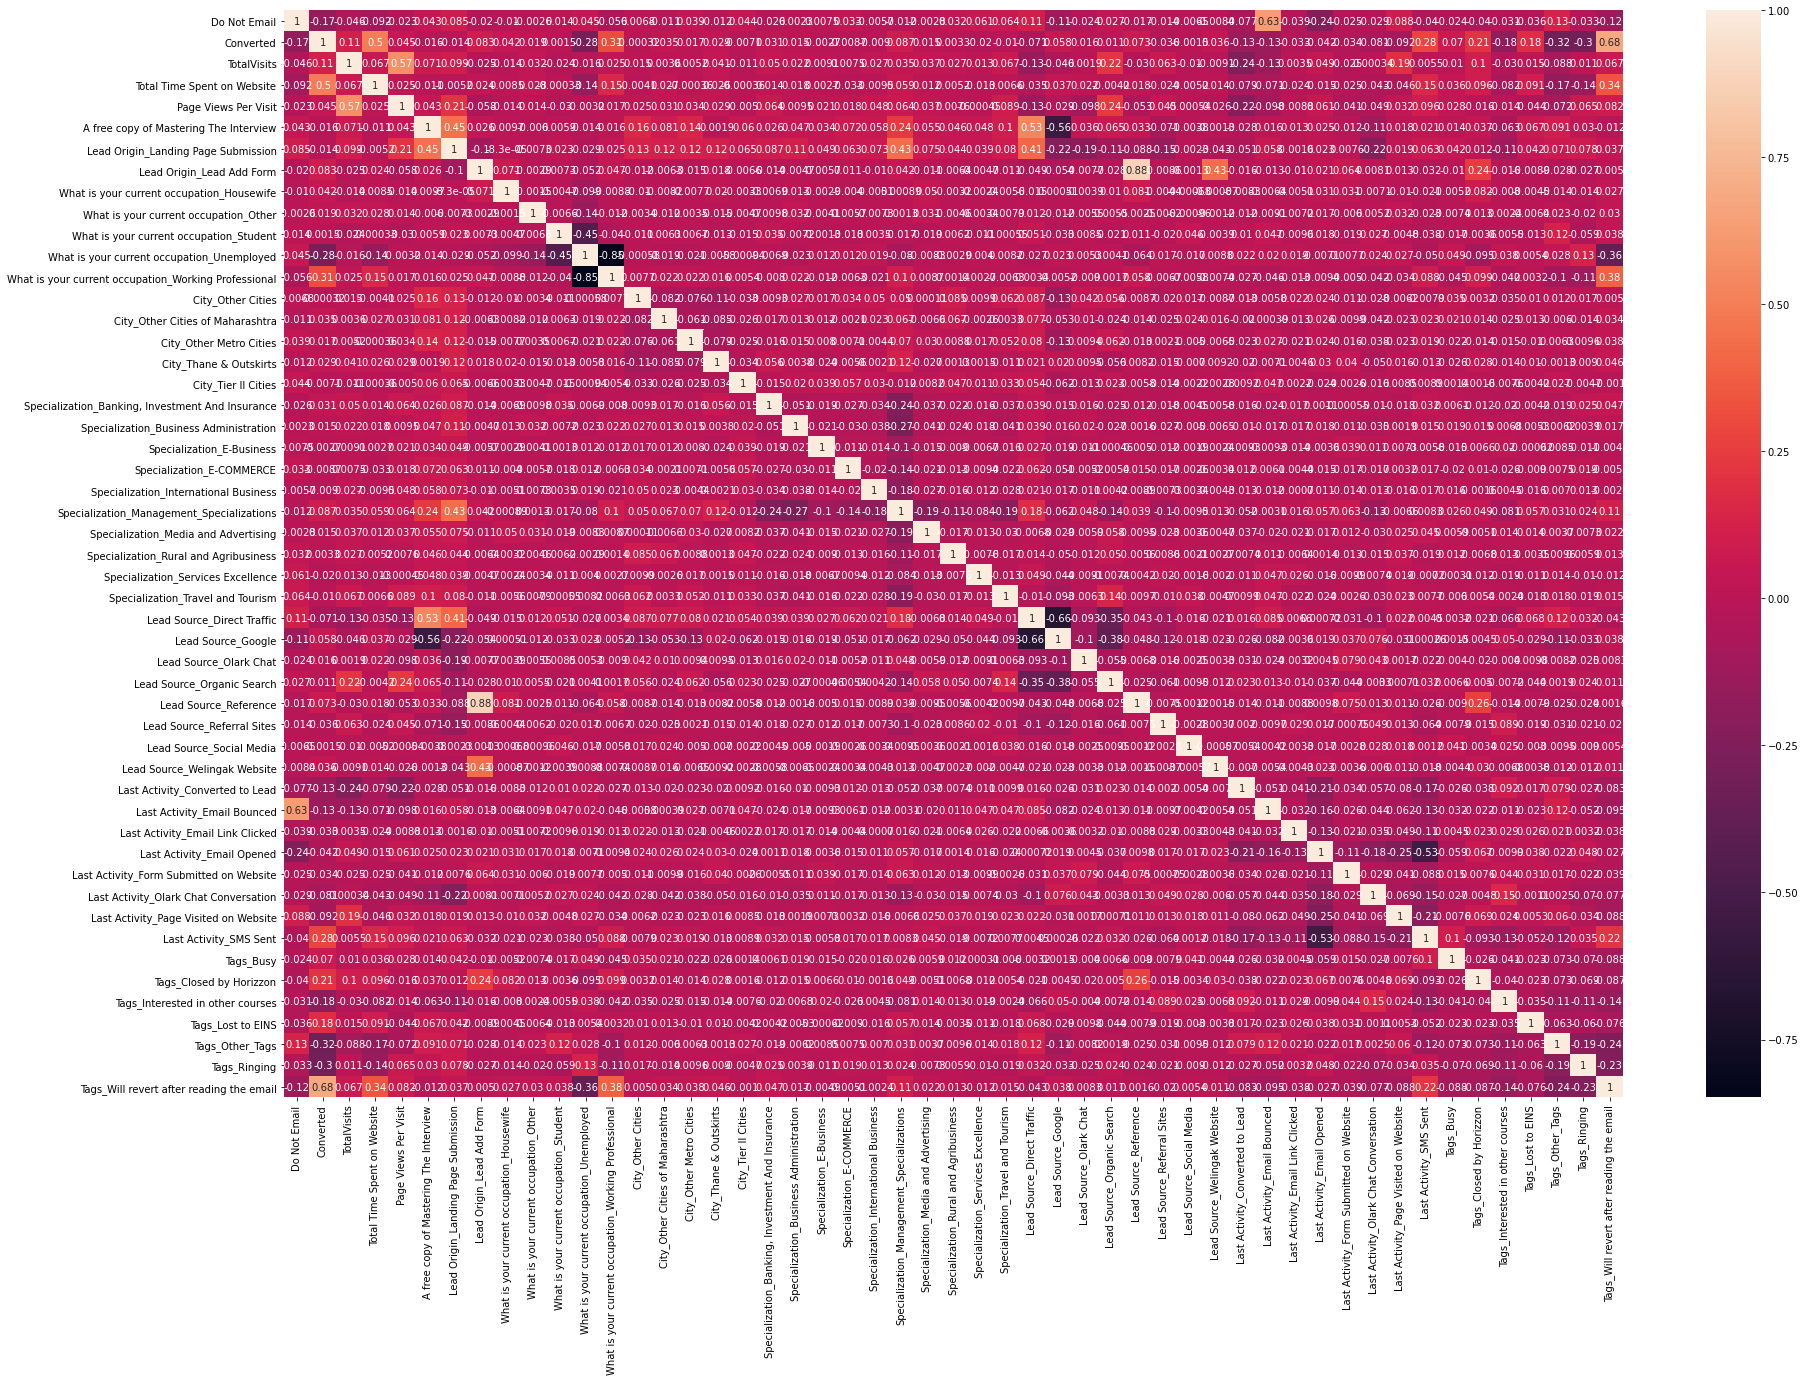

In [112]:
# Let's see the correlation matrix
plt.figure(figsize = (30,20))   
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

In [113]:
#Dropping highly correlated dummy variables
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [114]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

###  Model Building using Stats Model & RFE

In [115]:
# importing necessary library
import statsmodels.api as sm

In [116]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [117]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train, y_train)

In [118]:
rfe.support_

array([False, False,  True, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [119]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 8),
 ('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('A free copy of Mastering The Interview', False, 28),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Housewife', False, 19),
 ('What is your current occupation_Other', False, 33),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', False, 12),
 ('City_Other Cities', False, 31),
 ('City_Other Cities of Maharashtra', False, 20),
 ('City_Other Metro Cities', False, 27),
 ('City_Thane & Outskirts', False, 21),
 ('City_Tier II Cities', False, 30),
 ('Specialization_Banking, Investment And Insurance', False, 11),
 ('Specialization_Business Administration', False, 32),
 ('Specialization_E-Business', False, 9),
 ('Specialization_E-COMMERCE', False, 6),
 ('Specialization_International Business', False, 26),
 ('

In [120]:
#list of RFE supported columns
column = X_train.columns[rfe.support_]
column

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Specialization_Travel and Tourism', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [121]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead So

In [122]:
#BUILDING MODEL

X_train_sm = sm.add_constant(X_train[column])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4729
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -955.28
Date:                Thu, 06 Jan 2022   Deviance:                       1910.6
Time:                        13:11:58   Pearson chi2:                 6.14e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9440      0.397     -2.378      0.017      -1.722      -0.166
Total Time Spent on Website                    1.1450      0.062     18.367      0.000       1.023       1.267
Lead Origin_Lead Add Form                     22.2623   1.56e+04      0.001      0.999   -3.06e+04    3.06e+04
What is your current occupation_Student       -1.1681      0.783     -1.492      0.136      -2.702       0.366
What is your current occupation_Unemployed    -0.7713      0.389     -1.982      0.048      -1.534      -0.008
Specialization_Travel and Tourism             -0.8807      0.425     -2.071      0.038      -1.714      -0.047
Last Activity_Converted to Lead               -1.0998      0.330     -3.333      0.001      -1.747      -0.453
Last Activity_Email Bounced                   -1.7196      0.555     -3.100      0.002      -2.807      -0.633
Last Activity_SMS Sent                         1.6051      0.129     12.479      0.000       1.353       1.857
Tags_Busy                                      1.1045      0.237      4.656      0.000       0.640       1.569
Tags_Closed by Horizzon                        6.0867      1.019      5.974      0.000       4.090       8.084
Tags_Interested in other courses              -2.3586      0.421     -5.607      0.000      -3.183      -1.534
Tags_Lost to EINS                              4.8042      0.621      7.737      0.000       3.587       6.021
Tags_Other_Tags                               -2.4184      0.245     -9.886      0.000      -2.898      -1.939
Tags_Ringing                                  -3.1376      0.275    -11.404      0.000      -3.677      -2.598
Tags_Will revert after reading the email       4.4383      0.208     21.329      0.000       4.030       4.846
==============================================================================================================
"""

### Calculating VIF

In [123]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[column].columns
vif['VIF'] = [variance_inflation_factor(X_train[column].values, i) for i in range(X_train[column].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,2.92
7,Last Activity_SMS Sent,1.62
14,Tags_Will revert after reading the email,1.61
12,Tags_Other_Tags,1.49
13,Tags_Ringing,1.45
0,Total Time Spent on Website,1.20
10,Tags_Interested in other courses,1.16
5,Last Activity_Converted to Lead,1.11
9,Tags_Closed by Horizzon,1.11
8,Tags_Busy,1.10


### Predicting a Train Model

In [125]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6071    0.169858
5188    0.003362
1180    0.958159
5563    0.217465
6006    0.042900
9204    0.002086
4930    0.549183
7051    0.981373
5336    0.076247
7975    0.547138
dtype: float64

In [126]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16985797, 0.0033624 , 0.95815854, 0.21746457, 0.04289952,
       0.00208594, 0.54918304, 0.98137298, 0.0762467 , 0.54713789])

In [127]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.169858,6071
1,0,0.003362,5188
2,1,0.958159,1180
3,0,0.217465,5563
4,0,0.042900,6006


In [128]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


In [129]:
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.169858,6071,0
1,0,0.003362,5188,0
2,1,0.958159,1180,1
3,0,0.217465,5563,0
4,0,0.042900,6006,0


In [130]:
from sklearn import metrics

In [131]:
#Confusion metrics

confusion_metrics = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_metrics)

[[2863  134]
 [ 233 1515]]


In [132]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9226554267650158


In [133]:
True_positive = confusion_metrics[1,1] 
True_negative = confusion_metrics[0,0] 
False_positive = confusion_metrics[0,1] 
False_negative = confusion_metrics[1,0] 

In [134]:
# Let's see the sensitivity of our logistic regression model
True_positive / float(True_positive+False_negative)

0.8667048054919908

In [135]:
# Let us calculate specificity
True_negative / float(True_negative+False_positive)

0.9552886219552886

In [136]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(False_positive/ float(True_negative+False_positive))

0.044711378044711377


In [137]:
# positive predictive value 
print (True_positive / float(True_positive+False_positive))

0.9187386294724075


In [138]:
# Negative predictive value
print (True_negative / float(True_negative+ False_negative))

0.9247416020671835


### Plotting ROC Curve

In [139]:
def roc_plot( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    score_auc = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % score_auc )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

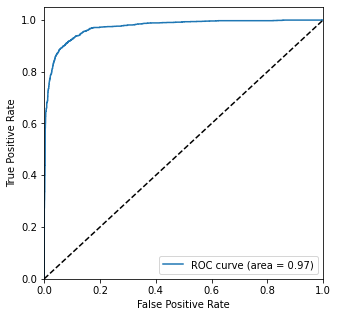

In [141]:
roc_plot(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

### Finding Optimal Cutoff Point

#### Getting balanced sensitivity and specificity

In [142]:
# Creating columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.169858,6071,0,1,1,0,0,0,0,0,0,0,0
1,0,0.003362,5188,0,1,0,0,0,0,0,0,0,0,0
2,1,0.958159,1180,1,1,1,1,1,1,1,1,1,1,1
3,0,0.217465,5563,0,1,1,1,0,0,0,0,0,0,0
4,0,0.042900,6006,0,1,0,0,0,0,0,0,0,0,0


In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_data = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in numbers:
    confusion_metrics_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1 = sum(sum(confusion_metrics_1))
    accuracy = (confusion_metrics_1[0,0] + confusion_metrics_1[1,1])/total1
    
    speci = confusion_metrics_1[0,0]/(confusion_metrics_1[0,0] + confusion_metrics_1[0,1])
    sensi = confusion_metrics_1[1,1]/(confusion_metrics_1[1,0] + confusion_metrics_1[1,1])
    cutoff_data.loc[i] = [ i ,accuracy,sensi,speci]
print(cutoff_data)

     prob  accuracy     sensi     speci
0.0   0.0  0.368388  1.000000  0.000000
0.1   0.1  0.859220  0.972540  0.793126
0.2   0.2  0.896101  0.949657  0.864865
0.3   0.3  0.914015  0.918764  0.911245
0.4   0.4  0.920126  0.893593  0.935602
0.5   0.5  0.922655  0.866705  0.955289
0.6   0.6  0.918230  0.836957  0.965632
0.7   0.7  0.910432  0.803776  0.972639
0.8   0.8  0.901370  0.764874  0.980981
0.9   0.9  0.876712  0.683638  0.989323


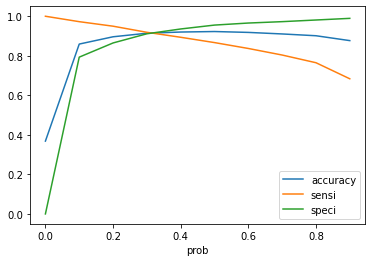

In [147]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_data.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

0.3 is the optimum point to take it as a cutoff probability.

In [148]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.169858,6071,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.003362,5188,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.958159,1180,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.217465,5563,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.042900,6006,0,1,0,0,0,0,0,0,0,0,0,0


In [149]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

In [150]:
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.169858,6071,0,17
1,0,0.003362,5188,0,0
2,1,0.958159,1180,1,96
3,0,0.217465,5563,0,22
4,0,0.042900,6006,0,4


In [151]:
# checking if 80% cases are correctly predicted based on the converted column.

checking_data = y_train_pred_final.loc[y_train_pred_final['Converted'] == 1 ,['Converted','final_Predicted']]
checking_data['final_Predicted'].value_counts()

1    1606
0     142
Name: final_Predicted, dtype: int64

In [153]:
# checking the precentage of final_predicted conversions

1605/float(1602+142)

0.9202981651376146

In [154]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9140147523709168

In [156]:
confusion_metrics_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_metrics_2

array([[2731,  266],
       [ 142, 1606]], dtype=int64)

In [157]:
true_positive = confusion2[1,1] 
true_negatives = confusion2[0,0] 
false_positives = confusion2[0,1] 
false_negatives = confusion2[1,0] 

In [158]:
# Checking the sensitivity
true_positive / float(true_positive+false_negatives)

0.9187643020594966

In [159]:
# Checking the specificity
true_negatives / float(true_negatives+false_positives)

0.9112445779112446

Below are the values for the train data:
- Accuracy : 91.40%
- Sensitivity :91.90%
- Specificity : 91.12%

In [160]:
# Calculate False Postive Rate 
print(false_positives/ float(true_negatives+false_positives))

0.08875542208875542


In [161]:
# Positive predictive value 
print (true_positive / float(true_positive+false_positives))

0.8579059829059829


In [162]:
# Negative predictive value
print (true_negatives / float(true_negatives+ false_negatives))

0.9505743125652628


### Precison and Recall

In [164]:
#Looking at the confusion matrix again

confusion_metrics = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_metrics

array([[2731,  266],
       [ 142, 1606]], dtype=int64)

In [166]:
##### Precision
true_positive / true_positive + false_positives

confusion_metrics[1,1]/(confusion_metrics[0,1]+confusion_metrics[1,1])

0.8579059829059829

In [167]:
##### Recall
true_positive / true_positive + false_negatives

confusion_metrics[1,1]/(confusion_metrics[1,0]+confusion_metrics[1,1])

0.9187643020594966

In [168]:
from sklearn.metrics import precision_score, recall_score

In [169]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8579059829059829

In [170]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9187643020594966

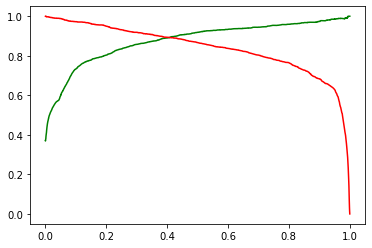

In [171]:
# Precision and Recall Trade-off

# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Plotting
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [172]:
# Predictions on the test set

# scaling test set

number_columns =X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[number_columns] = scaler.fit_transform(X_test[number_columns])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
141,-0.304895,0.664951,-0.750530,-0.674338,-0.861934,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3666,-0.304895,0.664951,-0.850288,-0.032781,-0.861934,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8605,-0.304895,-0.888765,-0.813341,-0.674338,-0.861934,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4158,-0.304895,-0.111907,-0.857678,0.608776,-0.861934,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7687,3.279821,0.276522,0.699656,1.250333,-0.861934,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [174]:
X_test = X_test[column]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Student,What is your current occupation_Unemployed,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
141,-0.750530,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3666,-0.850288,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8605,-0.813341,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4158,-0.857678,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7687,0.699656,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [175]:
X_test_s = sm.add_constant(X_test)

In [176]:
X_test_s.shape

(2034, 16)

In [178]:
y_test_pred = res.predict(X_test_s)    

In [181]:
y_test_pred[:15]

141     0.070781
3666    0.063627
8605    0.003066
4158    0.850802
7687    0.006354
627     0.058070
4730    0.000665
5776    0.073183
785     0.975748
2807    0.267922
8130    0.276724
1477    0.002068
1647    0.980377
8067    0.314486
9045    0.005495
dtype: float64

In [182]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [183]:
# Let's see the head
y_pred_1.head()

,0
141,0.070781
3666,0.063627
8605,0.003066
4158,0.850802
7687,0.006354


In [185]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
141,0
3666,0
8605,0
4158,1
7687,0
...,...
4597,1
687,0
2628,0
7352,0


In [187]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df['Prospect ID']

141      141
3666    3666
8605    8605
4158    4158
7687    7687
        ... 
4597    4597
687      687
2628    2628
7352    7352
2177    2177
Name: Prospect ID, Length: 2034, dtype: int64

In [188]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [189]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [190]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,141,0.070781
1,0,3666,0.063627
2,0,8605,0.003066
3,1,4158,0.850802
4,0,7687,0.006354


In [191]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [192]:
y_pred_final

,Converted,Prospect ID,Converted_prob
0,0,141,0.070781
1,0,3666,0.063627
2,0,8605,0.003066
3,1,4158,0.850802
4,0,7687,0.006354
...,...,...,...
2029,1,4597,0.935961
2030,0,687,0.094890
2031,0,2628,0.002421
2032,0,7352,0.005415


### Assigning Lead Score

In [193]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [194]:
y_pred_final['Lead_Score'] 

0        7
1        6
2        0
3       85
4        1
        ..
2029    94
2030     9
2031     0
2032     1
2033     1
Name: Lead_Score, Length: 2034, dtype: int64

In [195]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,141,0,0.070781,7
1,3666,0,0.063627,6
2,8605,0,0.003066,0
3,4158,1,0.850802,85
4,7687,0,0.006354,1


In [196]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [197]:
y_pred_final['final_Predicted']

0       0
1       0
2       0
3       1
4       0
       ..
2029    1
2030    0
2031    0
2032    0
2033    0
Name: final_Predicted, Length: 2034, dtype: int64

In [198]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,141,0,0.070781,7,0
1,3666,0,0.063627,6,0
2,8605,0,0.003066,0,0
3,4158,1,0.850802,85,1
4,7687,0,0.006354,1,0


In [201]:
# checking if 80% cases are correctly predicted based on the converted column.

checking_test_data = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_data['final_Predicted'].value_counts()

1    676
0     61
Name: final_Predicted, dtype: int64

In [202]:
# check the precentage of final_predicted conversions on test data

676/float(676+61)

0.9172320217096337

Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [203]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9149459193706981

In [205]:
confusion_metrics_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_metrics_2

array([[1185,  112],
       [  61,  676]], dtype=int64)

In [206]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [207]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9172320217096337

In [208]:
# Let us calculate specificity
TN / float(TN+FP)

0.9136468774094063

In [210]:
# Precision
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8578680203045685

In [212]:
# Recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9172320217096337

Inference:

After running the model on the Test Data these are the figures we obtain:

- Accuracy : 91.5%
- Sensitivity :91.8%
- Specificity : 91.3%

Below are the values for the train data:

- Accuracy : 91.40%
- Sensitivity :91.90%
- Specificity : 91.12%

The model is performing well in the test set, what it had learnt from the train set.

Conclusion:

- Data in the 'Country' column was highly skewed and thus, was dropped from the model. 

- Most of the values in the Specialisation columns were missing.

- The company seems to be doing pretty good in metropolitan areas

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.

- Accuracy, Sensitivity and Specificity values of test set are around 91%, 91% and 91% which are approximately closer to the respective values calculated using trained set.